In [1]:
%load_ext autoreload
%autoreload 2

import sys 
from os import getcwd, path
sys.path.append(path.dirname(getcwd()))
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
from utils import data

In [3]:
from cohorts.utils import first_not_none_param
from cohorts.variant_filters import no_filter
from varcode.effects import Substitution

In [4]:
cohort_without_bqsr = data.init_cohort(
    without_bqsr=True,
    cache_data_dir="/home/tavi/bladder-analyses/data/cache-without-bqsr")

Overriding VCF dir (/home/tavi/ct/bladder/vcfs-indelrealigned-bqsr) to use without-BQSR VCFs: /home/tavi/ct/bladder/vcfs


{'dataframe_hash': -2899676230513618006,
 'provenance_file_summary': {u'cohorts': u'0.4.0+2.g78ce133',
                             u'isovar': u'0.0.6',
                             u'mhctools': u'0.3.0',
                             u'numpy': u'1.11.1',
                             u'pandas': u'0.18.1',
                             u'pyensembl': u'1.0.1',
                             u'scipy': u'0.18.1',
                             u'topiary': u'0.1.0',
                             u'varcode': u'0.5.2+1.gb8119b4'}}


In [5]:
cohort_without_bqsr_or_filters = data.init_cohort(
    without_bqsr=True,
    filter_fn=no_filter,
    cache_data_dir="/home/tavi/bladder-analyses/data/cache-without-bqsr")

Overriding VCF dir (/home/tavi/ct/bladder/vcfs-indelrealigned-bqsr) to use without-BQSR VCFs: /home/tavi/ct/bladder/vcfs


{'dataframe_hash': -2899676230513618006,
 'provenance_file_summary': {u'cohorts': u'0.4.0+2.g78ce133',
                             u'isovar': u'0.0.6',
                             u'mhctools': u'0.3.0',
                             u'numpy': u'1.11.1',
                             u'pandas': u'0.18.1',
                             u'pyensembl': u'1.0.1',
                             u'scipy': u'0.18.1',
                             u'topiary': u'0.1.0',
                             u'varcode': u'0.5.2+1.gb8119b4'}}


In [6]:
cohort_with_bqsr = data.init_cohort()

{'dataframe_hash': -2899676230513618006,
 'provenance_file_summary': {u'cohorts': u'0.4.0+3.gda968fb',
                             u'isovar': u'0.0.6',
                             u'mhctools': u'0.3.0',
                             u'numpy': u'1.11.1',
                             u'pandas': u'0.18.1',
                             u'pyensembl': u'1.0.3',
                             u'scipy': u'0.18.1',
                             u'topiary': u'0.1.0',
                             u'varcode': u'0.5.10'}}


In [7]:
def missense_effects(cohort, filter_fn=None):
    filter_fn = first_not_none_param([filter_fn, cohort.filter_fn], no_filter)
    def missense_filter_fn(filterable_effect):
        assert filter_fn is not None, "filter_fn should never be None, but it is."
        return (type(filterable_effect.effect) == Substitution and
                filter_fn(filterable_effect))
    return cohort.load_effects(
        only_nonsynonymous=True,
        filter_fn=missense_filter_fn)

In [8]:
with_bqsr_effects = missense_effects(cohort_with_bqsr)

In [9]:
without_bqsr_effects = missense_effects(cohort_without_bqsr)

In [10]:
without_bqsr_or_filters_effects = missense_effects(cohort_without_bqsr_or_filters)

In [11]:
def num_bqsr_with_without(row):
    patient_id = row["patient_id"]
    # Effects aren't hashable
    with_bqsr_effects_patient = set([effect.variant for effect in with_bqsr_effects[patient_id]])
    without_bqsr_effects_patient = set([effect.variant for effect in without_bqsr_effects[patient_id]])
    return len(without_bqsr_effects_patient.difference(with_bqsr_effects_patient))

In [12]:
def num_bqsr_with_without_or_filters(row):
    patient_id = row["patient_id"]
    # Effects aren't hashable
    with_bqsr_effects_patient = set([effect.variant for effect in with_bqsr_effects[patient_id]])
    without_bqsr_or_filters_effects_patient = set([effect.variant for effect in without_bqsr_or_filters_effects[patient_id]])
    return len(without_bqsr_or_filters_effects_patient.difference(with_bqsr_effects_patient))

In [13]:
from cohorts.functions import *

In [14]:
from utils.paper import *

Mann-Whitney test: U=104.5, p-value=0.0678354181387 (two-sided)
{{{bqsr_diff_plot}}}
{{{bqsr_diff_benefit:14.00 (range 2.00-219.00)}}}
{{{bqsr_diff_no_benefit:3.00 (range 0.00-69.00)}}}
{{{bqsr_diff_mw:n=25, Mann-Whitney p=0.068}}}


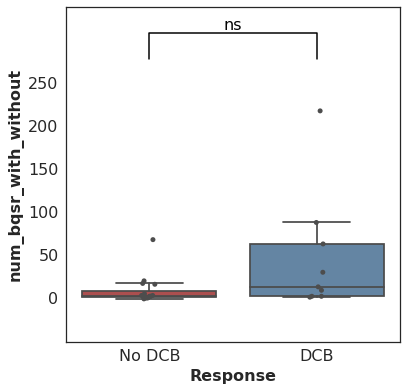

In [15]:
mann_whitney_hyper_label_printer(cohort_with_bqsr.plot_benefit(num_bqsr_with_without),
                                 label="bqsr_diff")

Mann-Whitney test: U=119.5, p-value=0.00778250321954 (two-sided)
{{{bqsr_and_filter_diff_plot}}}
{{{bqsr_and_filter_diff_benefit:196.00 (range 53.00-399.00)}}}
{{{bqsr_and_filter_diff_no_benefit:76.00 (range 16.00-553.00)}}}
{{{bqsr_and_filter_diff_mw:n=25, Mann-Whitney p=0.0078}}}


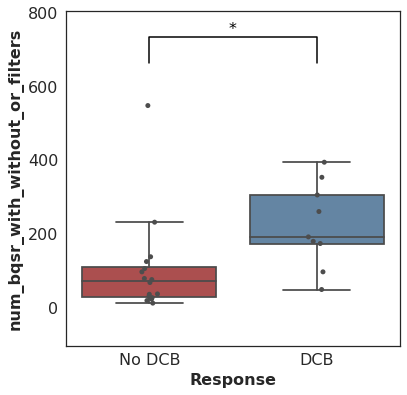

In [16]:
mann_whitney_hyper_label_printer(cohort_with_bqsr.plot_benefit(
        num_bqsr_with_without_or_filters), label="bqsr_and_filter_diff")